# Predicting heart disease using an artificial neural network.

In [827]:
# importing libraries
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
import keras


## Data Preproccessing & Normalisation

In [828]:
content = loadarff(r'data.arff') #reading/ loading the data
df = pd.DataFrame(content[0])

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160.0,12.00,5.73,23.11,b'1',49.0,25.30,97.20,52.0,b'2'
1,144.0,0.01,4.41,28.61,b'2',55.0,28.87,2.06,63.0,b'2'
2,118.0,0.08,3.48,32.28,b'1',52.0,29.14,3.81,46.0,b'1'
3,170.0,7.50,6.41,38.03,b'1',51.0,31.99,24.26,58.0,b'2'
4,134.0,13.60,3.50,27.78,b'1',60.0,25.99,57.34,49.0,b'2'


In [829]:
attr = ['V1: sbp', 'V2: tobacco', 'V3: ldl', 'V4: adiposity', 'V5: famhist', 'V6: type', 'V7: obesity', 'V8: alcohol', 'V9: age']
df.columns = ['V1: sbp', 'V2: tobacco', 'V3: ldl', 'V4: adiposity', 'V5: famhist', 'V6: type', 'V7: obesity', 'V8: alcohol', 'V9: age', 'Class: chd']

attr #this is a list containing the column names which will be used later for normalising and testing the dataset. It only contains the numeric columns. 

['V1: sbp',
 'V2: tobacco',
 'V3: ldl',
 'V4: adiposity',
 'V5: famhist',
 'V6: type',
 'V7: obesity',
 'V8: alcohol',
 'V9: age']

In [830]:
encoder = LabelEncoder()
scaler = MinMaxScaler()
df['V5: famhist']=encoder.fit_transform(df['V5: famhist'])
df['Class: chd']=encoder.fit_transform(df['Class: chd'])
df.head()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
0,160.0,12.00,5.73,23.11,0,49.0,25.30,97.20,52.0,1
1,144.0,0.01,4.41,28.61,1,55.0,28.87,2.06,63.0,1
2,118.0,0.08,3.48,32.28,0,52.0,29.14,3.81,46.0,0
3,170.0,7.50,6.41,38.03,0,51.0,31.99,24.26,58.0,1
4,134.0,13.60,3.50,27.78,0,60.0,25.99,57.34,49.0,1


<AxesSubplot:>

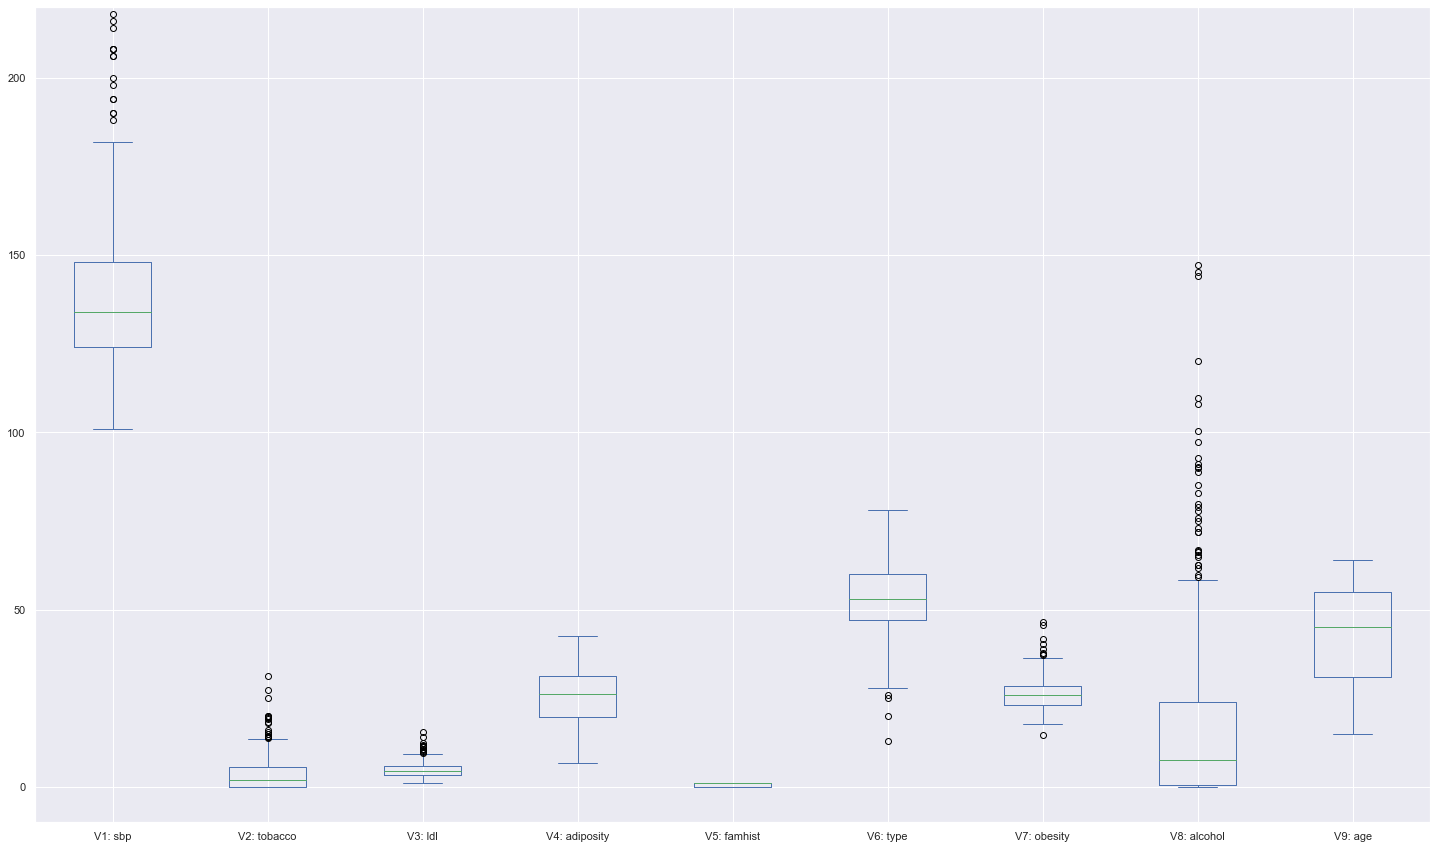

In [831]:
df[attr].plot(kind='box',figsize=(25,15),ylim=[-10,220])

In [832]:
# time to remove the dots (data outside of the boxplot) to make the prediction more accurate
for col in attr:
    q3, q1 = np.percentile(df[col], [75,25])
    IQR = q3 - q1
    maxbP = q3 + 1.5 * IQR
    minbP = q1 - 1.5 * IQR
    df = df[(df[col] > minbP) & (df[col] < maxbP)]
    
df.head()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
1,144.0,0.01,4.41,28.61,1,55.0,28.87,2.06,63.0,1
2,118.0,0.08,3.48,32.28,0,52.0,29.14,3.81,46.0,0
3,170.0,7.50,6.41,38.03,0,51.0,31.99,24.26,58.0,1
5,132.0,6.20,6.47,36.21,0,62.0,30.77,14.14,45.0,0
6,142.0,4.05,3.38,16.20,1,59.0,20.81,2.62,38.0,0


<AxesSubplot:>

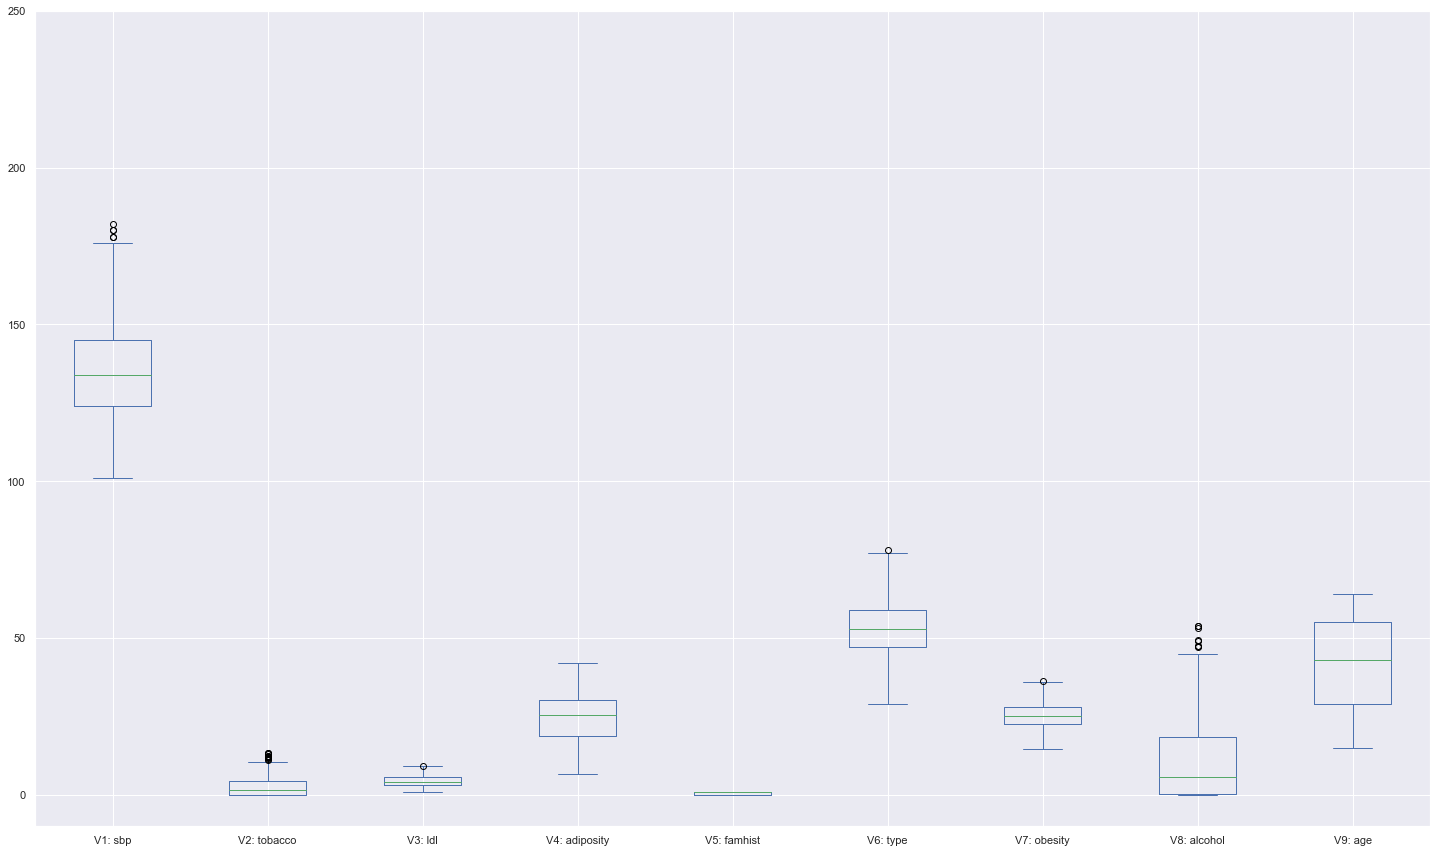

In [833]:

df[attr].plot(kind='box',figsize=(25,15),ylim=[-10,250])

In [834]:
df[attr] = scaler.fit_transform(df[attr]) 
df.head()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
1,0.530864,0.000741,0.417783,0.617273,1.0,0.530612,0.651195,0.038148,0.979592,1
2,0.209877,0.005926,0.304507,0.720858,0.0,0.469388,0.663603,0.070556,0.632653,0
3,0.851852,0.555556,0.661389,0.883150,0.0,0.448980,0.794577,0.449259,0.877551,1
5,0.382716,0.459259,0.668697,0.831781,0.0,0.673469,0.738511,0.261852,0.612245,0
6,0.506173,0.300000,0.292326,0.267005,1.0,0.612245,0.280790,0.048519,0.469388,0


In [835]:
df.isnull().any()

V1: sbp          False
V2: tobacco      False
V3: ldl          False
V4: adiposity    False
V5: famhist      False
V6: type         False
V7: obesity      False
V8: alcohol      False
V9: age          False
Class: chd       False
dtype: bool

In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1 to 461
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   V1: sbp        377 non-null    float64
 1   V2: tobacco    377 non-null    float64
 2   V3: ldl        377 non-null    float64
 3   V4: adiposity  377 non-null    float64
 4   V5: famhist    377 non-null    float64
 5   V6: type       377 non-null    float64
 6   V7: obesity    377 non-null    float64
 7   V8: alcohol    377 non-null    float64
 8   V9: age        377 non-null    float64
 9   Class: chd     377 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 30.9 KB


In [837]:
df.describe()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.427907,0.207350,0.428949,0.501601,0.588859,0.492448,0.496982,0.210661,0.542738,0.310345
std,0.206805,0.241956,0.211649,0.218006,0.492695,0.188056,0.173281,0.248396,0.308733,0.463250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283951,0.000000,0.272838,0.338132,0.000000,0.367347,0.362592,0.006852,0.285714,0.000000
50%,0.407407,0.111111,0.389769,0.526390,1.000000,0.489796,0.485294,0.108519,0.571429,0.000000
75%,0.543210,0.330370,0.560292,0.662997,1.000000,0.612245,0.614430,0.342778,0.816327,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [838]:
df['V5: famhist'].value_counts()

1.0    222
0.0    155
Name: V5: famhist, dtype: int64

In [839]:
df['Class: chd'].value_counts()

0    260
1    117
Name: Class: chd, dtype: int64

In [840]:
scale = MinMaxScaler(feature_range =(0,100))

### The variation of values across the DataFrame for first 50 values

<AxesSubplot:>

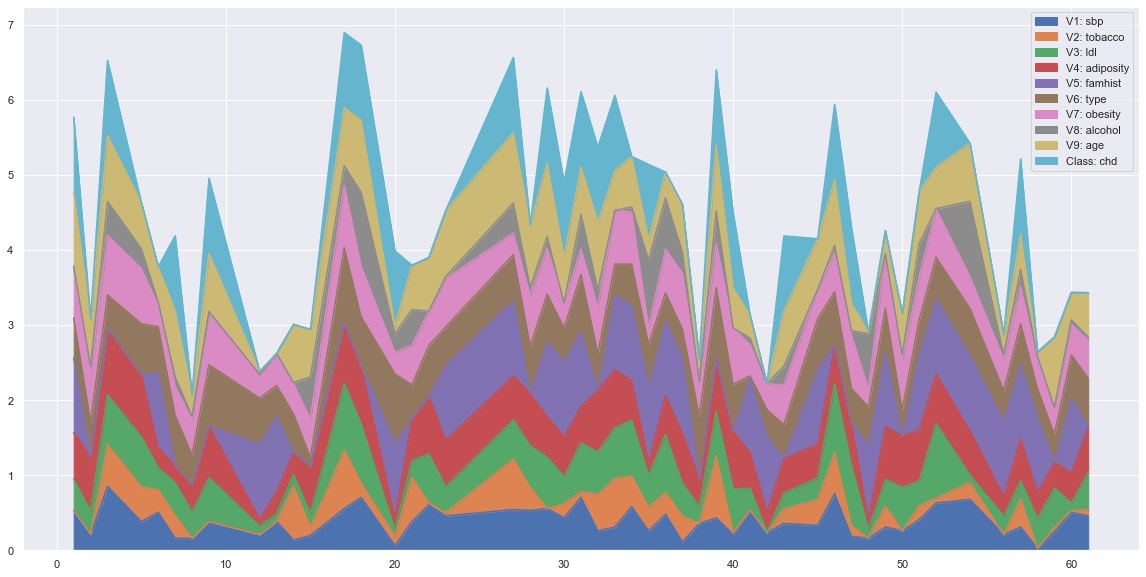

In [841]:
df.head(50).plot(kind='area',figsize=(20,10))

### Distribution of Obesity according to the age

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='V9: age', ylabel='V7: obesity'>

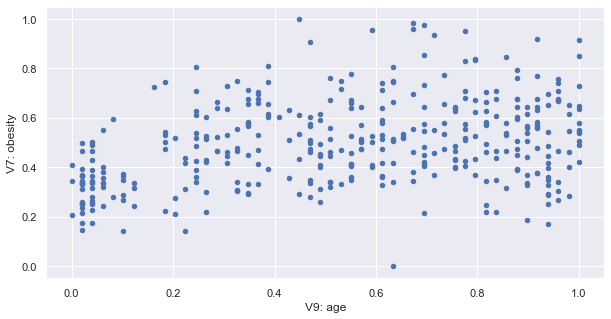

In [842]:
df.plot(x='V9: age',y='V7: obesity',kind='scatter',figsize =(10,5))

### Distribution of Tobacco consumption across age

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='V9: age', ylabel='V2: tobacco'>

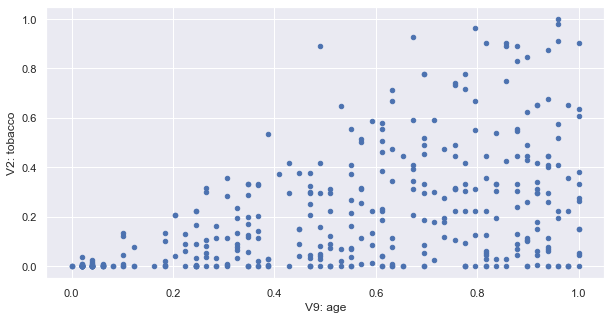

In [843]:
df.plot(x='V9: age',y='V2: tobacco',kind='scatter',figsize =(10,5))

### Distribution of Alcohol consumption across age

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='V9: age', ylabel='V8: alcohol'>

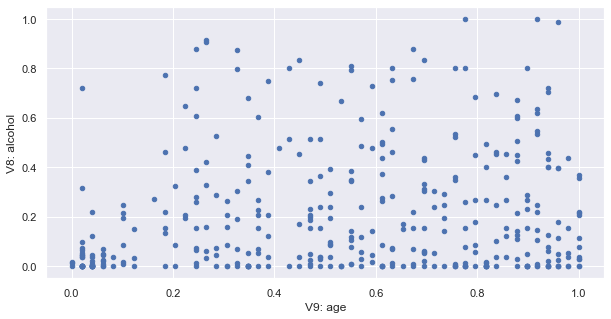

In [844]:
df.plot(x='V9: age',y='V8: alcohol',kind='scatter',figsize =(10,5))

## Testing and Training

In [845]:
# splitting the data into test and train having a test size of 20% and 80% train size
Xtrain, Xtest, ytrain, ytest = tts(df[attr], df['Class: chd'], test_size=0.3, random_state=0)

<AxesSubplot:>

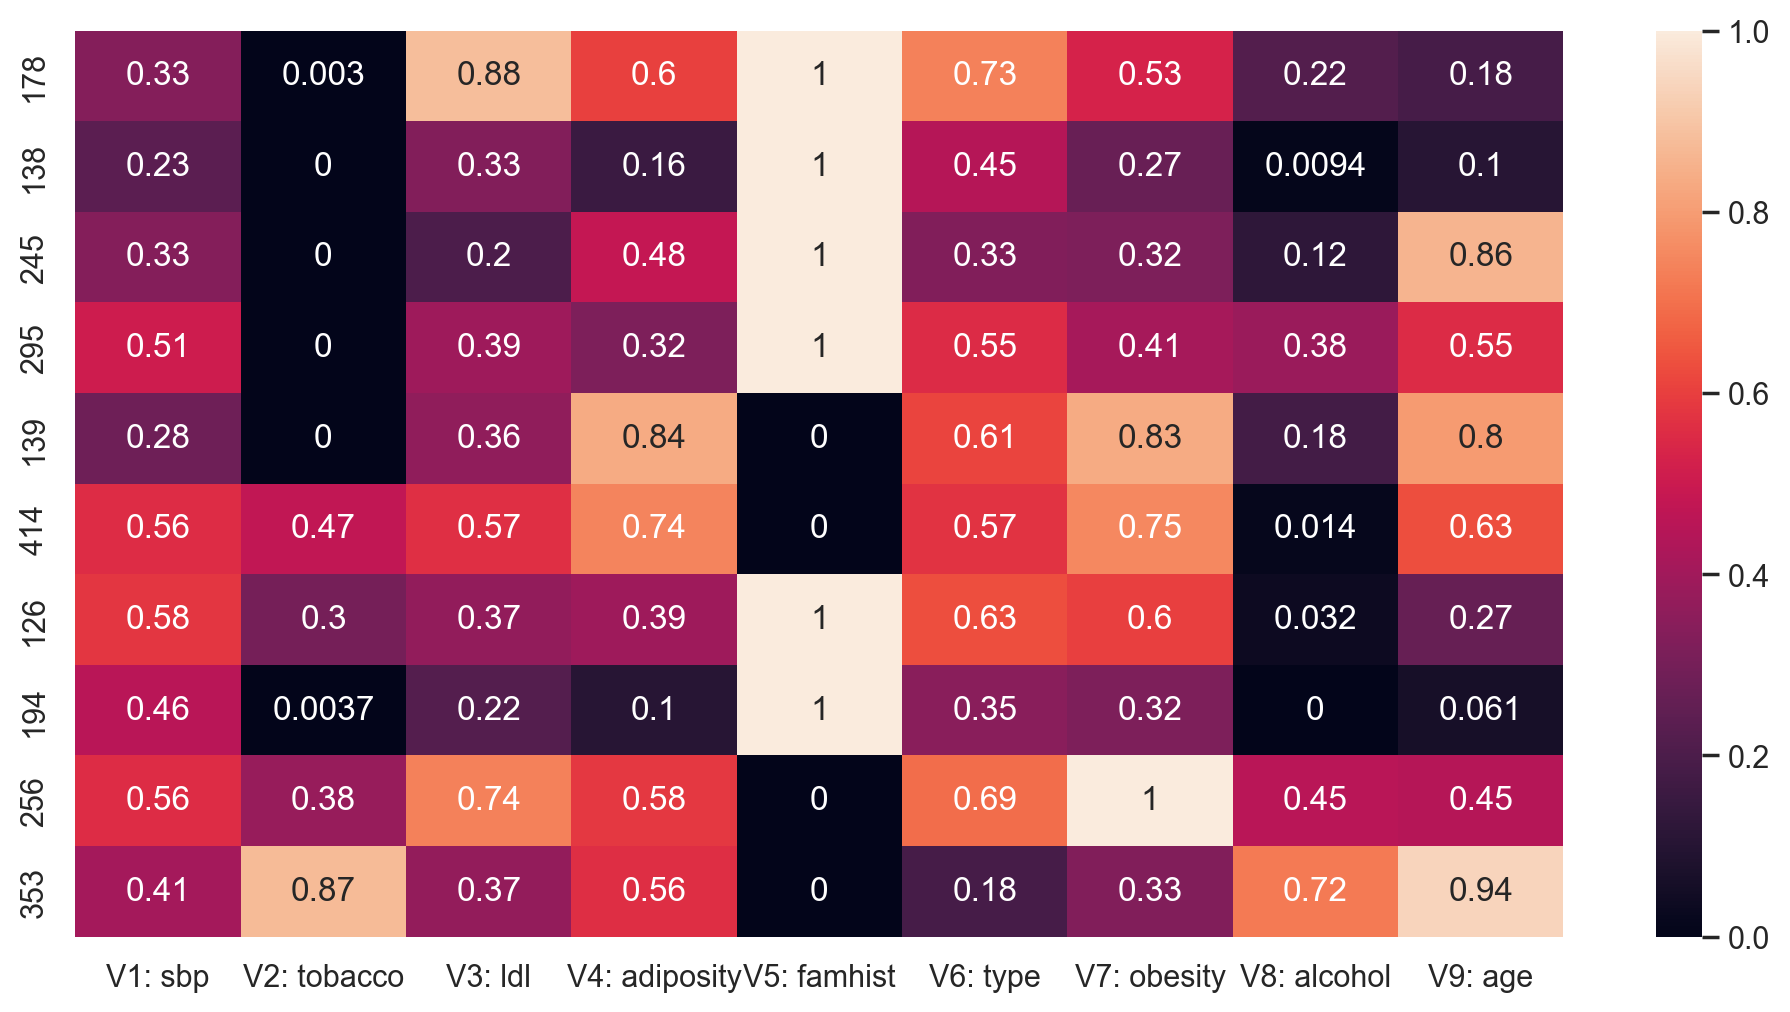

In [846]:
sns.set()
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(data = Xtrain.head(10),annot = True)

In [847]:
print('Training Features shape', Xtrain.shape)
print('Training Labels shape', ytrain.shape)
print('Testing Features shape', Xtest.shape)
print('Testing Labels shape', ytest.shape)

Training Features shape (263, 9)
Training Labels shape (263,)
Testing Features shape (114, 9)
Testing Labels shape (114,)


In [848]:
rand = statistics.mode(ytrain)
pred = [rand] *len(ytest)

BaseAcc = accuracy_score(ytest , pred)
print(f'Base Line Accuracy: {round(BaseAcc*100, 0)}%' )

Base Line Accuracy: 65.0%


In [849]:
mlp = MLPClassifier(max_iter=5000)
para = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,20,20,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1234],
             'max_iter':[10000],
             'early_stopping':[False]}

score = make_scorer(accuracy_score)

# Run grid search 
grid = GridSearchCV(mlp, para, scoring=score,cv = 5)
grid = grid.fit(Xtrain, ytrain)

# Pick the best combination of parameters
ann_clf = grid.best_estimator_
mlp.fit(Xtrain, ytrain)

MLPClassifier(max_iter=5000)

In [850]:
mlp_pred = mlp.predict(Xtest)
mlp_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1])

In [851]:
mlp_acc = accuracy_score(ytest, mlp_pred)
print(f'the ANN accuracy is: {round(mlp_acc * 100, 0)}%' )

the ANN accuracy is: 71.0%


Text(30.5, 0.5, 'Truth')

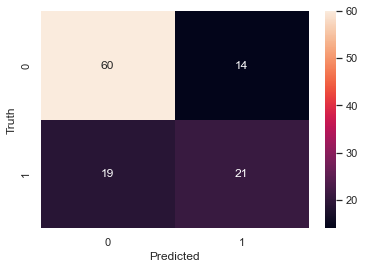

In [852]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=mlp_pred)

sns.heatmap(cm,annot =True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [853]:
trainMod = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
     ])
trainMod.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = trainMod.fit(Xtrain, ytrain, epochs=200)
history

Epoch 1/200
9/9 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.3308
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 0.7056 - accuracy: 0.4030
Epoch 3/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.4715
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5285
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5437
Epoch 6/200
9/9 [==============================] - 0s 939us/step - loss: 0.6865 - accuracy: 0.6198
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6806
Epoch 8/200
9/9 [==============================] - 0s 1000us/step - loss: 0.6787 - accuracy: 0.6996
Epoch 9/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.7072
Epoch 10/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.7110
Epoch 11/200
9/9 [======

In [854]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = history.epoch

In [855]:
mlp_acc = accuracy_score(ytest, mlp_pred)
 
print(f'MLP ANN accuracy is: {round(mlp_acc * 100, 0)}%' )

MLP ANN accuracy is: 71.0%


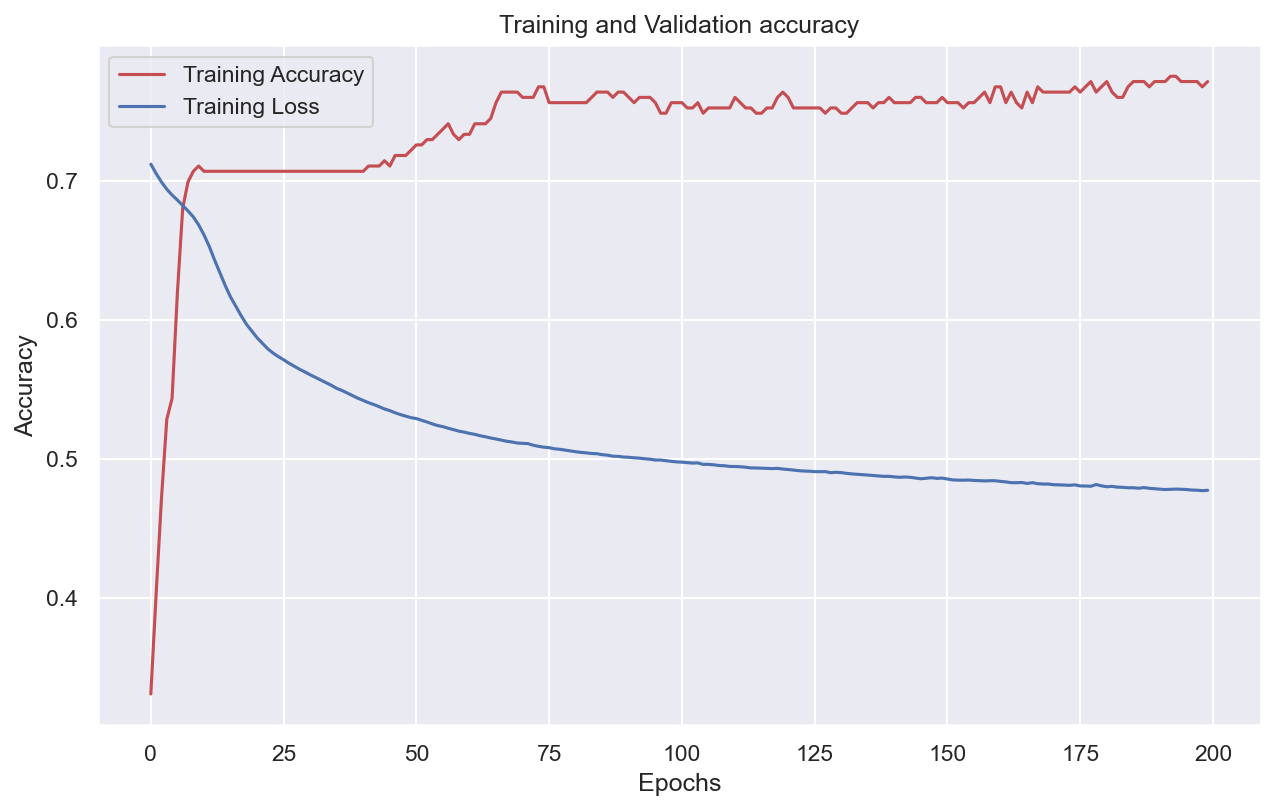

In [856]:
plt.figure(figsize=(10,6), dpi=150)
plt.plot(history.epoch, history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.epoch, history.history['loss'], 'b', label='Training Loss')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(30.5, 0.5, 'Truth')

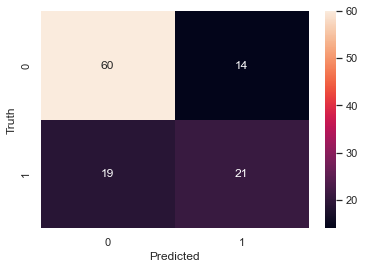

In [857]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=mlp_pred)

sns.heatmap(cm,annot =True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')